# Ensemble Analysis

This notebook reads in and formats outputs from ensemble simulations so that you can evaluate and plot

### Import packages

In [11]:
#import packages
import flopy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import pandas as pd
import numpy as np
import os
import csv

#additional analysis tools
import flopy.utils.binaryfile as bf
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


np.set_printoptions(threshold=np.inf)

#jupyter specific--included to show plots in notebook
%matplotlib inline 

# Setup static variables

In [12]:
nrow = 50 #number of rows
ncol = 50 #number of columns
nlay = 3  #number of layers
dx= 1000 #width of grid cells in x direction 
dy= 1000 #width of grid cells in y direction 
Lx = ncol*dx  #width of domain in x
Ly = nrow*dy #width of domain in y

ensembles = [[1,1,1,1,3,3,1],
[1,2,2,1,1,2,2],
[2,1,3,3,2,1,3],
[2,2,2,2,3,3,3],
[2,1,3,3,1,2,2],
[2,2,3,3,1,1,2],
[2,1,1,2,2,2,3],
[2,2,3,3,2,1,1],
[2,1,2,3,2,2,1],
[3,3,3,3,3,3,3]]

n_ens = len(ensembles)
print(n_ens, 'Ensembles to evaluate')


10 Ensembles to evaluate


## Read in the heads and create timeseries at points

In [13]:
#setup well locations and observation points
#town well
well_loc = (0,21, 38) #town well 
welli_loc = (0,12, 14) #ag irrigation well 
wello_loc = (0, 15, 15)  # Extra well if you need it

#setup timeseries
head_ts = []  # timeseris of head at town well
ag_head_ts = []  # timeseries of head at agg well
mw1_head_ts = []  # timeseries of head at observation well

# Loop through the ensembles and read the data
root_name = 'ensemble_' #root of the run names
for i in range(len(ensembles)):
    name = root_name  #Create the file name from list 
    for k in range(len(ensembles[i])):
        string = str(ensembles[i][k])
        name = name + string   

    #read in the head and water budget files
    headobj = flopy.utils.binaryfile.HeadFile(name+'.hds')
   
    #Extract out time series of heads at points of interest
    head_ts.append(headobj.get_ts(well_loc))
    mw1_head_ts.append(headobj.get_ts(wello_loc))
    ag_head_ts.append(headobj.get_ts(welli_loc))
    times = headobj.get_times()
    head_ts.append(np.mean(headobj.get_ts(well_loc)))
    #print(budgobj.get_unique_record_names())

## Store complete gridded outputs as arrays

In [14]:
#setup arrays to store the values
head_array = np.zeros((len(ensembles), len(times), nlay, ncol, nrow))
frf_array = np.zeros((len(ensembles), len(times), nlay, ncol, nrow))
fff_array = np.zeros((len(ensembles), len(times), nlay, ncol, nrow))
recharge_array = np.zeros((len(ensembles), len(times), 1, ncol, nrow))
et_array = np.zeros((len(ensembles), len(times), 1, ncol, nrow))
stor_array = np.zeros((len(ensembles), len(times), 1, ncol, nrow))
#print(head_array[:, 240, 0, 38, 21])
# Loop through the ensembles and read the data
root_name = 'ensemble_' #root of the run names
for i in range(len(ensembles)):
    name = root_name  #Create the file name from list 
    for k in range(len(ensembles[i])):
        string = str(ensembles[i][k])
        name = name + string   

    #read in the head and water budget files
    headobj = flopy.utils.binaryfile.HeadFile(name+'.hds')
    budgobj = flopy.utils.binaryfile.CellBudgetFile(name+'.cbc')   

    rowcounter = -1
    for t in times:
        rowcounter += 1
        head_array[i, rowcounter,:, :, :] = headobj.get_data(totim=t)
        
        tempfrf = np.squeeze(budgobj.get_data(text='flow right face', totim=t))
        frf_array[i, rowcounter,:, :, :] = tempfrf
        
        tempfff = np.squeeze(budgobj.get_data(text='FLOW FRONT FACE', totim=t))
        fff_array[i, rowcounter,:, :, :] = tempfff

        temprch = np.squeeze(budgobj.get_data(text='RECHARGE', totim=t))
        recharge_array[i, rowcounter, :, :, :] = temprch[1]

        tempet = np.squeeze(budgobj.get_data(text='ET', totim=t))
        et_array[i, rowcounter, :, :, :] = tempet[1]

#print(head_array[:, 0, 0, 21, 38])
en0 = head_array[0, 0, 0, :, :]
en11 = head_array[0, 31, 0, :, :]
en12= head_array[0, 32, 0, :, :]
en13= head_array[0, 33, 0, :, :]
en14= head_array[0, 34, 0, :, :]
en15 = head_array[0, 35, 0, :, :]
en16= head_array[0, 36, 0, :, :]
en17= head_array[0, 37, 0, :, :]
en18= head_array[0, 38, 0, :, :]
en19 = head_array[0, 93, 0, :, :]
en110= head_array[0, 40, 0, :, :]
en111= head_array[0, 41, 0, :, :]
en112= head_array[0, 42, 0, :, :]
en113 = head_array[0, 43, 0, :, :]
en114= head_array[0, 44, 0, :, :]
en115= head_array[0, 45, 0, :, :]
en116= head_array[0, 46, 0, :, :]
en117= head_array[0, 47, 0, :, :]
en118= head_array[0, 48, 0, :, :]
en119= head_array[0, 49, 0, :, :]
en120 = head_array[0, 50, 0, :, :]
en121= head_array[0, 51, 0, :, :]
en122= head_array[0, 52, 0, :, :]
en123= head_array[0, 53, 0, :, :]
en124= head_array[0, 54, 0, :, :]

en101 = head_array[9, 10, 0, :, :]
en102= head_array[9, 20, 0, :, :]
en103= head_array[9, 30, 0, :, :]
en104= head_array[9, 40, 0, :, :]
en105 = head_array[9, 50, 0, :, :]
en106= head_array[9, 60, 0, :, :]
en107= head_array[9, 70, 0, :, :]
en108= head_array[9, 80, 0, :, :]
en109 = head_array[9, 90, 0, :, :]
en1010= head_array[9, 100, 0, :, :]
en1011= head_array[9, 110, 0, :, :]
en1012= head_array[9, 120, 0, :, :]
en1013 = head_array[9, 130, 0, :, :]
en1014= head_array[9, 140, 0, :, :]
en1015= head_array[9, 150, 0, :, :]
en1016= head_array[9, 160, 0, :, :]
en1017= head_array[9, 170, 0, :, :]
en1018= head_array[9, 180, 0, :, :]
en1019= head_array[9, 190, 0, :, :]
en1020 = head_array[9, 200, 0, :, :]
en1021= head_array[9, 210, 0, :, :]
en1022= head_array[9, 220, 0, :, :]
en1023= head_array[9, 230, 0, :, :]
en1024= head_array[9, 240, 0, :, :]



#size = np.shape(en1)
#print(size)

dataframe = pd.DataFrame(en11) 
dataframe.to_csv('Ensemble11.csv')

dataframe = pd.DataFrame(en12) 
dataframe.to_csv('Ensemble12.csv')

dataframe = pd.DataFrame(en13) 
dataframe.to_csv('Ensemble13.csv')

dataframe = pd.DataFrame(en14) 
dataframe.to_csv('Ensemble14.csv')

dataframe = pd.DataFrame(en15) 
dataframe.to_csv('Ensemble15.csv')

dataframe = pd.DataFrame(en16) 
dataframe.to_csv('Ensemble16.csv')

dataframe = pd.DataFrame(en17) 
dataframe.to_csv('Ensemble17.csv')

dataframe = pd.DataFrame(en18)
dataframe.to_csv('Ensemble18.csv')

dataframe = pd.DataFrame(en19) 
dataframe.to_csv('Ensemble19.csv')

dataframe = pd.DataFrame(en110) 
dataframe.to_csv('Ensemble110.csv')

dataframe = pd.DataFrame(en111) 
dataframe.to_csv('Ensemble111.csv')

dataframe = pd.DataFrame(en112) 
dataframe.to_csv('Ensemble112.csv')

dataframe = pd.DataFrame(en113) 
dataframe.to_csv('Ensemble113.csv')

dataframe = pd.DataFrame(en114) 
dataframe.to_csv('Ensemble114.csv')

dataframe = pd.DataFrame(en115) 
dataframe.to_csv('Ensemble115.csv')

dataframe = pd.DataFrame(en116) 
dataframe.to_csv('Ensemble116.csv')

dataframe = pd.DataFrame(en117) 
dataframe.to_csv('Ensemble117.csv')

dataframe = pd.DataFrame(en118) 
dataframe.to_csv('Ensemble118.csv')

dataframe = pd.DataFrame(en119)
dataframe.to_csv('Ensemble119.csv')

dataframe = pd.DataFrame(en120) 
dataframe.to_csv('Ensemble120.csv')

dataframe = pd.DataFrame(en121) 
dataframe.to_csv('Ensemble121.csv')

dataframe = pd.DataFrame(en122) 
dataframe.to_csv('Ensemble122.csv')

dataframe = pd.DataFrame(en123) 
dataframe.to_csv('Ensemble123.csv')

dataframe = pd.DataFrame(en124) 
dataframe.to_csv('Ensemble124.csv')
#...............................................................

dataframe = pd.DataFrame(en101) 
dataframe.to_csv('Ensemble101.csv')

dataframe = pd.DataFrame(en102) 
dataframe.to_csv('Ensemble102.csv')

dataframe = pd.DataFrame(en103) 
dataframe.to_csv('Ensemble103.csv')

dataframe = pd.DataFrame(en104) 
dataframe.to_csv('Ensemble104.csv')

dataframe = pd.DataFrame(en105) 
dataframe.to_csv('Ensemble105.csv')

dataframe = pd.DataFrame(en106) 
dataframe.to_csv('Ensemble106.csv')

dataframe = pd.DataFrame(en107) 
dataframe.to_csv('Ensemble107.csv')

dataframe = pd.DataFrame(en108)
dataframe.to_csv('Ensemble108.csv')

dataframe = pd.DataFrame(en109) 
dataframe.to_csv('Ensemble109.csv')

dataframe = pd.DataFrame(en1010) 
dataframe.to_csv('Ensemble1010.csv')

dataframe = pd.DataFrame(en1011) 
dataframe.to_csv('Ensemble1011.csv')

dataframe = pd.DataFrame(en1012) 
dataframe.to_csv('Ensemble1012.csv')

dataframe = pd.DataFrame(en1013) 
dataframe.to_csv('Ensemble1013.csv')

dataframe = pd.DataFrame(en1014) 
dataframe.to_csv('Ensemble1014.csv')

dataframe = pd.DataFrame(en1015) 
dataframe.to_csv('Ensemble1015.csv')

dataframe = pd.DataFrame(en1016) 
dataframe.to_csv('Ensemble1016.csv')

dataframe = pd.DataFrame(en1017) 
dataframe.to_csv('Ensemble1017.csv')

dataframe = pd.DataFrame(en1018) 
dataframe.to_csv('Ensemble1018.csv')

dataframe = pd.DataFrame(en1019)
dataframe.to_csv('Ensemble1019.csv')

dataframe = pd.DataFrame(en1020) 
dataframe.to_csv('Ensemble1020.csv')

dataframe = pd.DataFrame(en1021) 
dataframe.to_csv('Ensemble1021.csv')

dataframe = pd.DataFrame(en1022) 
dataframe.to_csv('Ensemble1022.csv')

dataframe = pd.DataFrame(en1023) 
dataframe.to_csv('Ensemble1023.csv')

dataframe = pd.DataFrame(en1024) 
dataframe.to_csv('Ensemble1024.csv')



## Read in the river leakage

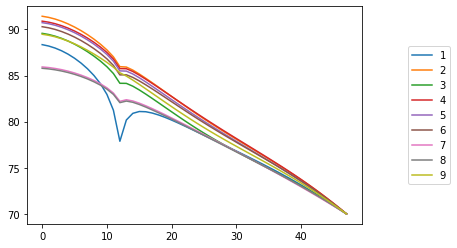

In [15]:
#setup arrays to store the values
leakage_array = np.zeros((len(ensembles), len(times), 49))

# Loop through the ensembles and read the data
root_name = 'ensemble_' #root of the run names
for i in range(len(ensembles)):
    name = root_name  #Create the file name from list 
    for k in range(len(ensembles[i])):
        string = str(ensembles[i][k])
        name = name + string   

    #water budget files
    budgobj = flopy.utils.binaryfile.CellBudgetFile(name+'.cbc')   

    rowcounter = -1
    for t in times:
        rowcounter += 1

        templeak = budgobj.get_data(text='RIVER LEAKAGE', totim=t)
        leakage_array[i, rowcounter,:] = templeak[0].q
#plt.plot(head_array[9,-10,0,12,2:])
plt.savefig('head drop-profile ensemble1.jpg')

for j in range(len(ensembles)):
    label = 'Ensemble ' + str(j)

#plt.plot(head_array[1,-1,0,12,2:],label=1)

#plt.plot(head_array[2,-1,0,12,2:],label=2)

#plt.plot(head_array[3,-1,0,12,2:],label=3)

#plt.plot(head_array[4,-1,0,12,2:],label=4)

#plt.plot(head_array[5,-1,0,12,2:],label=5)

#plt.plot(head_array[6,-1,0,12,2:],label=6)

#plt.plot(head_array[7,-1,0,12,2:],label=7)

#plt.plot(head_array[8,-1,0,12,2:],label=8)

#plt.plot(head_array[9,-1,0,12,2:],label=9)
#plt.legend(bbox_to_anchor=(1.2, 0.5), loc='center', ncol=1)

plt.plot(head_array[1,50,0,12,2:],label=1)
plt.plot(head_array[2,-10,0,12,2:],label=2)
plt.plot(head_array[3,50,0,12,2:],label=3)
plt.plot(head_array[4,50,0,12,2:],label=4)
plt.plot(head_array[5,50,0,12,2:],label=5)
plt.plot(head_array[6,50,0,12,2:],label=6)
plt.plot(head_array[7,50,0,12,2:],label=7)
plt.plot(head_array[8,50,0,12,2:],label=8)
plt.plot(head_array[9,50,0,12,2:],label=9)
plt.legend(bbox_to_anchor=(1.2, 0.5), loc='center', ncol=1)
#plt.savefig('head drop-profile ensemble_all_at_2_9.jpg')
plt.show()

# Plot all ensembles together

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


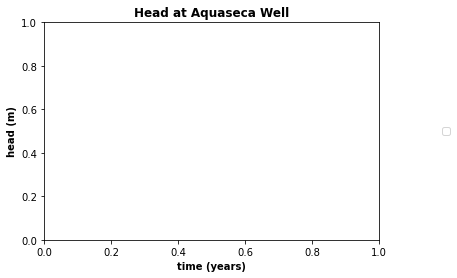

In [16]:
#Head at Aquaseca well 
plt.subplot(1, 1, 1)
plt.title("Head at Aquaseca Well",fontweight='bold')
plt.xlabel('time (years)',fontweight='bold')
plt.ylabel('head (m)',fontweight='bold')
# plt.ylim(75.2,75.8)
#for j in range(len(ensembles)):
   # label = 'Ensemble ' + str(j)
   # plt.plot(head_ts[j][:, 0]/360, head_ts[j][:, 1], label=label) #plot the time series with points at each record
plt.legend(bbox_to_anchor=(1.2, 0.5), loc='center', ncol=1)
plt.savefig("Head_Aqua_ensem.png",dpi=600)
plt.show()

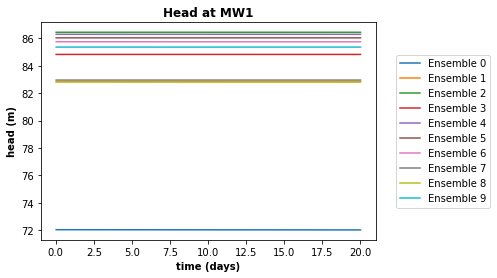

In [17]:
# Head at observation well
plt.subplot(1, 1, 1)
plt.title("Head at MW1",fontweight='bold')
plt.xlabel('time (days)',fontweight='bold')
plt.ylabel('head (m)',fontweight='bold')
for j in range(len(ensembles)):
    label = 'Ensemble ' + str(j)
    plt.plot(mw1_head_ts[j][:, 0]/360, mw1_head_ts[j][:, 1], label=label) #plot the time series with points at each record
plt.legend(bbox_to_anchor=(1.2, 0.5), loc='center', ncol=1)
plt.savefig("Head_M1_ensem.png",dpi=600)
plt.show()

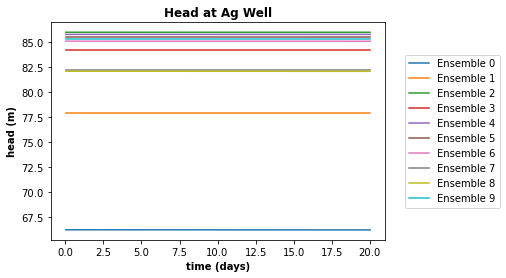

In [18]:
#Ag Well Plot
plt.subplot(1, 1, 1)
plt.title("Head at Ag Well",fontweight='bold')
plt.xlabel('time (days)',fontweight='bold')
plt.ylabel('head (m)',fontweight='bold')
for j in range(len(ensembles)):
    label = 'Ensemble ' + str(j)
    plt.plot(ag_head_ts[j][:, 0]/360, ag_head_ts[j][:, 1], label=label) #plot the time series with points at each record

plt.legend(bbox_to_anchor=(1.2, 0.5), loc='center', ncol=1)
plt.savefig("Head_irri_ensem.png",dpi=600)
plt.show()

## Alternate approach: Read in variables and store as dictionaries

In [19]:
#setup some structures to store data in 
head = np.tile({}, n_ens)
head_at_well = np.tile({}, n_ens)
leakage = np.tile({}, n_ens)
fff = np.tile({}, n_ens)
stor = np.tile({}, n_ens)
recharge = np.tile({}, n_ens)
et = np.tile({}, n_ens)
frf = np.tile({}, n_ens)

# Loop through the ensembles and read the data
root_name = 'ensemble_' #root of the run names
for i in range(len(ensembles)):
    name = root_name  #Create the file name from list 
    for k in range(len(ensembles[i])):
        string = str(ensembles[i][k])
        name = name + string   
                   
    head[i] = {}
    head_at_well[i] = {}
    leakage[i] = {}
    fff[i] = {}
    stor[i] = {}
    recharge[i] = {}
    et[i] = {}
    frf[i] = {}

    #read in the head and water budget files
    headobj = flopy.utils.binaryfile.HeadFile(name+'.hds')
    budgobj = flopy.utils.binaryfile.CellBudgetFile(name+'.cbc')
   
    #store the complete arrays in dictionaries
    for stress_per, time in enumerate(times): #iterate through times at end of each stress period
        head[i]['sp%s'%(stress_per)] = headobj.get_data(totim=time) #append heads to head list for ea stress per
        leakage[i]['sp%s'%(stress_per)] = budgobj.get_data(text='RIVER LEAKAGE',totim=time) #append right face flow to frf list for ea stress per
        fff[i]['sp%s'%(stress_per)] = budgobj.get_data(text='FLOW FRONT FACE',totim=time) #append front face flow to fff list for ea stress per
        frf[i]['sp%s'%(stress_per)] = budgobj.get_data(text='flow right face', totim=time)
        stor[i]['sp%s'%(stress_per)] = budgobj.get_data(text='STORAGE',totim=time)
        recharge[i]['sp%s'%(stress_per)] = budgobj.get_data(text='RECHARGE', totim=time) 
        et[i]['sp%s'%(stress_per)] = budgobj.get_data(text='ET', totim=time) 
        #for j in range(len(ensembles)):
        #head_at_well[i]['sp%s'%(stress_per)] = head_ts.append(np.mean(headobj.get_ts(well_loc)))     


### Plot a timeseries at the well


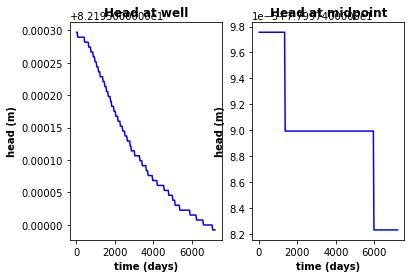

In [20]:
#extract time series at the well and at the center
time_series_well = headobj.get_ts((0,20,20))  # get the time series using flopy
center_point = (0, int(nrow/2), int(ncol/2)) #find the center of the domain
time_series_center = headobj.get_ts(center_point)
#time_series_head = headobj.get_ts((:,12,:))


#Plot
plt.subplot(1, 2, 1)
plt.title("Head at well", fontweight='bold')
plt.xlabel('time (days)', fontweight='bold')
plt.ylabel('head (m)', fontweight='bold')
plt.plot(time_series_well[:, 0], time_series_well[:, 1], 'b-')

plt.subplot(1, 2, 2)
plt.title("Head at midpoint", fontweight='bold')
plt.xlabel('time (days)', fontweight='bold')
plt.ylabel('head (m)', fontweight='bold')
plt.plot(time_series_center[:, 0], time_series_center[:, 1], 'b-')
plt.savefig('Timeseries at the well21.jpg')
plt.show()
